In [69]:
import pandas as pd
heart_data = pd.read_csv('data/heart.zip')
heart_data.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


Датасет болезней сердца содержит информацию о пациентах и переменную предсказания target — наличие у пациента болезни сердца.

Датасет содержит следующие признаки:

- `age` — возраст
- `sex` — пол (1 - мужчина, 0 - женщина)
- `cp` — тип боли в груди (4 значения)
- `trestbps` — артериальное давление в покое
- `chol` — холестерин сыворотки в мг/дл
- `fbs` — уровень сахара в крови натощак > 120 мг/дл
- `restecg` — результаты электрокардиографии в покое (значения 0,1,2)
- `thalach` — достигнута максимальная частота сердечных сокращений
- `exang` — стенокардия, вызванная физической нагрузкой
- `oldpeak` — депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя
- `slope` — наклон пикового сегмента ST при нагрузке
- `ca` — количество крупных сосудов (0-3), окрашенных при флюроскопии
- `thal` — дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект


In [70]:
# Создайте новый признак old, где 1 — при возрасте пациента более 60 лет.
heart_data['old'] = heart_data['age'].apply(lambda x: 1 if x > 60 else 0)

In [71]:
#В ответ введите результат выполнения кода heart['old'].sum()
heart_data['old'].sum()

np.int64(79)

In [72]:
#Создайте новый признак `trestbps_mean`, который будет обозначать норму давления в среднем для его возраста и пола.
# trestbps — систолическое артериальное давление в состоянии покоя.

def bps_norm(heart_row):
    res_norm = 0
    me_age = heart_row['age']
    me_sex = heart_row['sex']
    list_norm = [
        [0, 20, 123, 116],
        [21, 30, 126, 120],
        [31, 40, 129, 127],
        [41, 50, 135, 137],
        [51, 60, 142, 144],
        [61, 150, 142, 159]
    ]
    cols_norm = ['min_age', 'max_age', 'men', 'women']
    df_norm = pd.DataFrame(list_norm, columns=cols_norm)

    mask = (me_age >= df_norm['min_age']) & (me_age <= df_norm['max_age'])

    if me_sex == 1:
        res_norm = df_norm.loc[mask,'men'].values[0]
    else:
        res_norm = df_norm.loc[mask,'women'].values[0]
    return res_norm

heart_data['trestbps_mean'] = heart_data.apply(bps_norm, axis=1)

In [73]:
#В ответ напишите значение признака trestbps_mean для пациента под номером 300.
print(heart_data['trestbps_mean'][300])

142


In [74]:
#Проанализируйте датасет и выберите категориальные признаки.
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,0.260726,141.669967
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.439757,7.437821
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,137.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,0.000000,142.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,1.000000,142.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,1.000000,159.000000


In [75]:
import category_encoders as ce
print(heart_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   cp             303 non-null    int64  
 3   trestbps       303 non-null    int64  
 4   chol           303 non-null    int64  
 5   fbs            303 non-null    int64  
 6   restecg        303 non-null    int64  
 7   thalach        303 non-null    int64  
 8   exang          303 non-null    int64  
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    int64  
 11  ca             303 non-null    int64  
 12  thal           303 non-null    int64  
 13  target         303 non-null    int64  
 14  old            303 non-null    int64  
 15  trestbps_mean  303 non-null    int64  
dtypes: float64(1), int64(15)
memory usage: 38.0 KB
None


In [76]:
def use_OneHotEncoders(job_df, params):
    for i in range(0,len(params)):
        encoder = ce.OneHotEncoder(cols=[params[i]]) # указываем столбец для кодирования
        type_bin = encoder.fit_transform(job_df[params[i]])
        job_df = pd.concat([job_df, type_bin], axis=1)


    job_df = job_df.drop(columns = params, axis=1)
    return job_df

In [77]:
list_params = ['cp','restecg','slope','ca','thal']

heart_data = use_OneHotEncoders(heart_data,list_params)
print(heart_data.columns)

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'target', 'old', 'trestbps_mean', 'cp_1', 'cp_2', 'cp_3', 'cp_4',
       'restecg_1', 'restecg_2', 'restecg_3', 'slope_1', 'slope_2', 'slope_3',
       'ca_1', 'ca_2', 'ca_3', 'ca_4', 'ca_5', 'thal_1', 'thal_2', 'thal_3',
       'thal_4'],
      dtype='object')


In [95]:
import numpy as np

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

In [89]:
# для нормализации, стандартизации
from sklearn import preprocessing

#числовые параметры
col_names = ['oldpeak','age','trestbps','trestbps_mean','chol','thalach']
#Исходные распределения числовых показателей

def visible_plot(job_df, title):
# зададим параметры холста, название и визуализируем кривые распределения:
    fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
    ax1.set_title(title)

    # kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
    sns.kdeplot(job_df['oldpeak'], ax=ax1, label ='oldpeak')
    sns.kdeplot(job_df['age'], ax=ax1, label ='age')
    sns.kdeplot(job_df['trestbps'], ax=ax1, label ='trestbps')
    sns.kdeplot(job_df['trestbps'], ax=ax1, label ='trestbps')
    sns.kdeplot(job_df['trestbps_mean'], ax=ax1, label ='trestbps_mean')
    sns.kdeplot(job_df['chol'], ax=ax1, label ='chol')
    sns.kdeplot(job_df['thalach'], ax=ax1, label ='thalach')
    plt.legend()


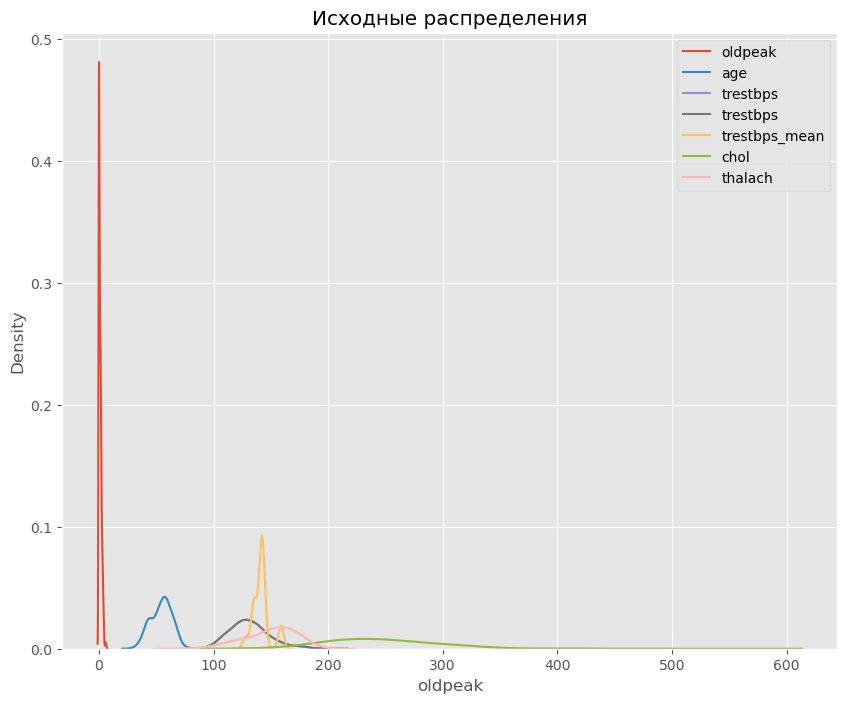

In [88]:
visible_plot(heart_data,'Исходные распределения')

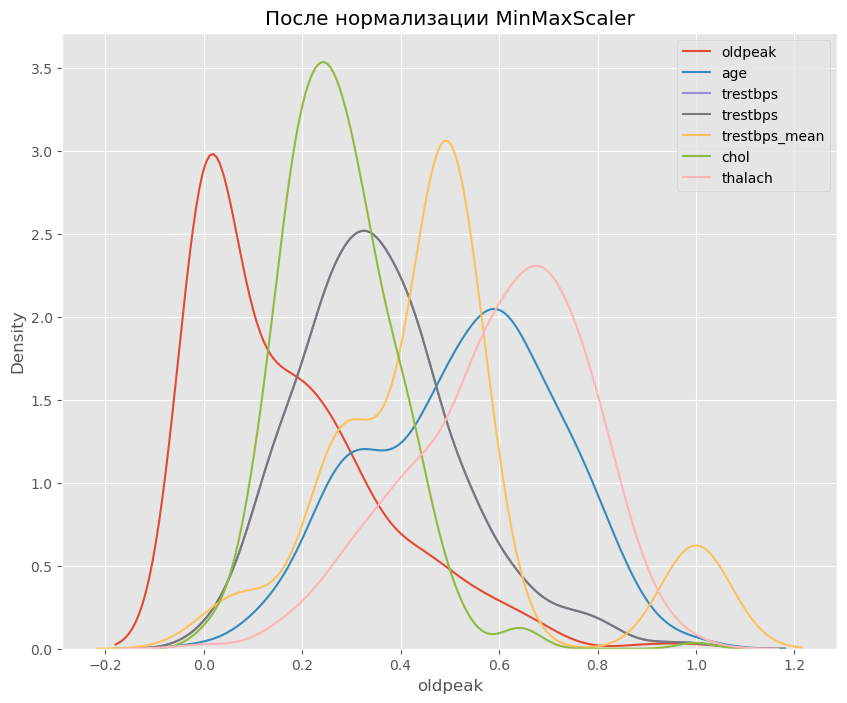

In [93]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# кодируем исходный датасет
heart_mm = mm_scaler.fit_transform(heart_data[col_names])

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
heart_mm = pd.DataFrame(heart_mm, columns = col_names)
visible_plot(heart_mm,'После нормализации MinMaxScaler')

In [107]:
heart_mm.describe()

,oldpeak,age,trestbps,trestbps_mean,chol,thalach
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.167678,0.528465,0.354941,0.474847,0.274575,0.600358
std,0.187270,0.189210,0.165454,0.225389,0.118335,0.174849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.385417,0.245283,0.333333,0.194064,0.477099
50%,0.129032,0.541667,0.339623,0.484848,0.260274,0.625954
75%,0.258065,0.666667,0.433962,0.484848,0.339041,0.725191
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


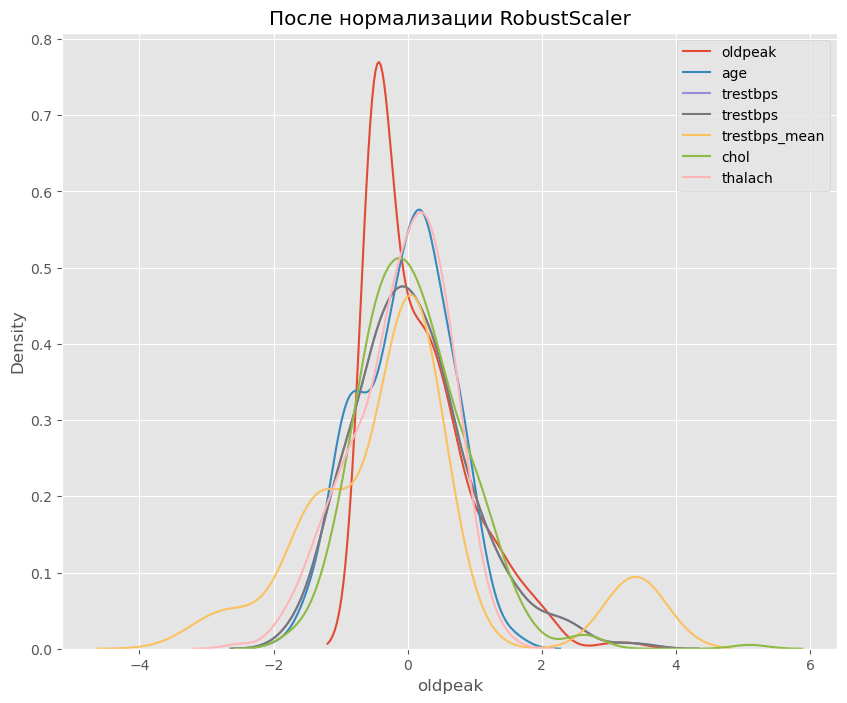

In [94]:
# инициализируем нормализатор RobustScaler
rb_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
heart_rb = rb_scaler.fit_transform(heart_data[col_names])

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
heart_rb = pd.DataFrame(heart_rb, columns = col_names)
visible_plot(heart_rb,'После нормализации RobustScaler')

In [101]:
heart_rb.describe()

,oldpeak,age,trestbps,trestbps_mean,chol,thalach
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.149752,-0.046938,0.081188,-0.066007,0.098646,-0.103173
std,0.725672,0.672748,0.876907,1.487564,0.816232,0.704774
min,-0.500000,-1.925926,-1.800000,-3.200000,-1.795276,-2.523077
25%,-0.500000,-0.555556,-0.500000,-1.000000,-0.456693,-0.600000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.444444,0.500000,0.000000,0.543307,0.400000
max,3.375000,1.629630,3.500000,3.400000,5.102362,1.507692


<Axes: title={'center': 'Корреляция'}>

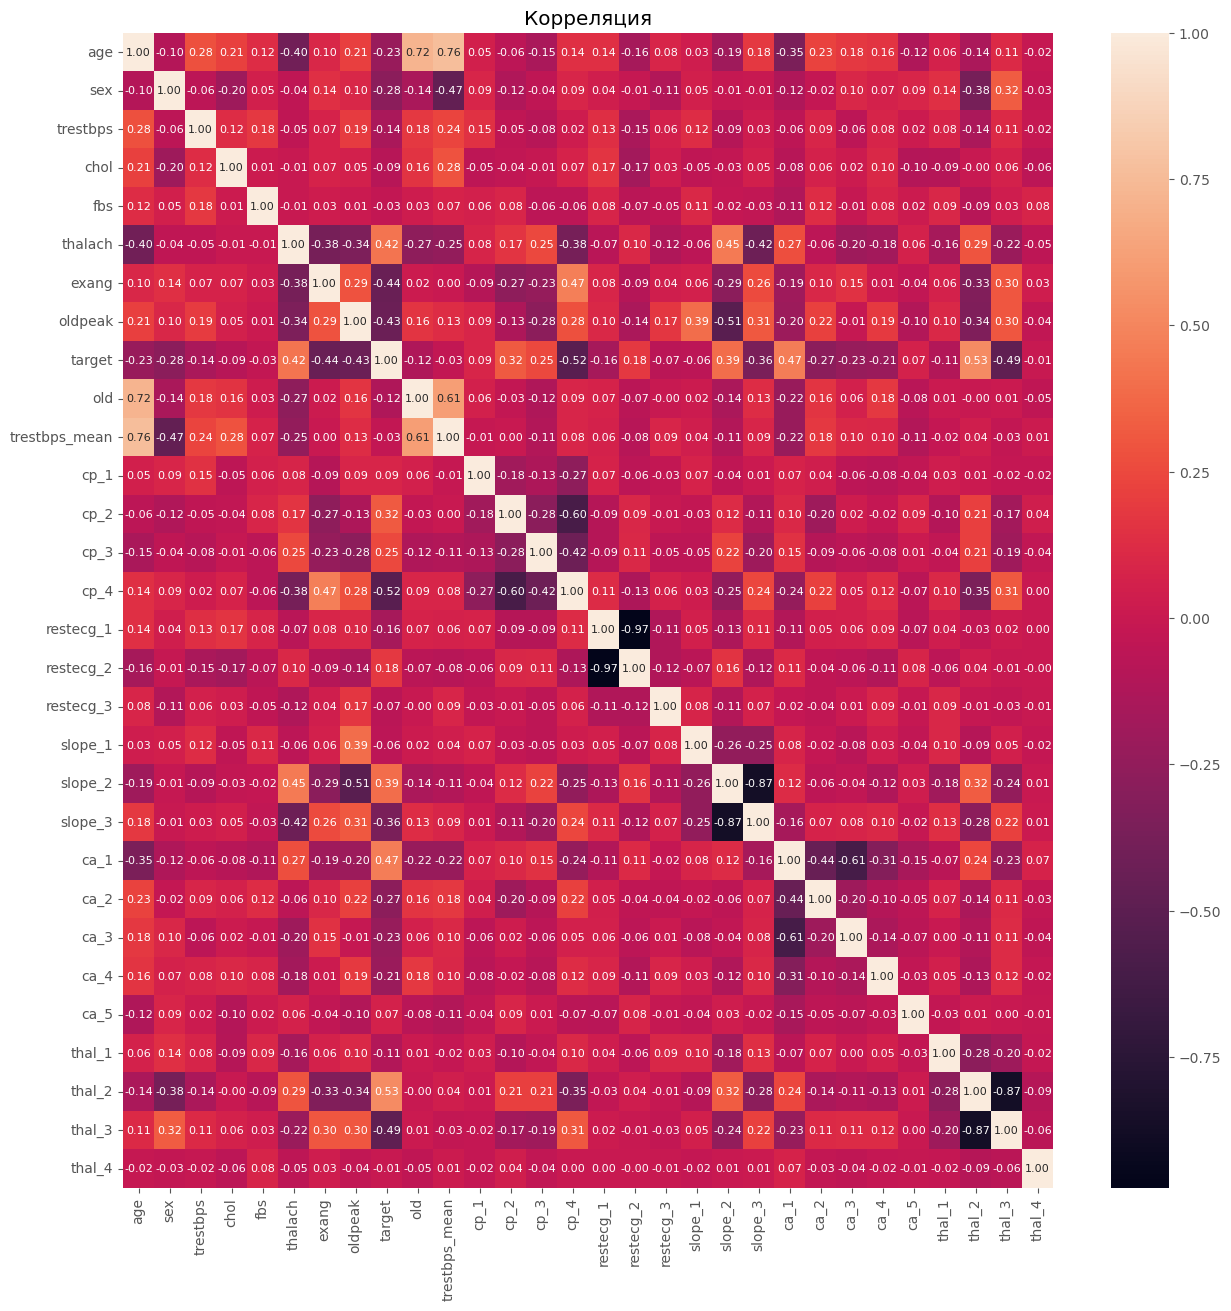

In [116]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(15, 15))
ax1.set_title('Корреляция')

# отсеиваем числовые признаки и включаем отображение коэффициентов
sns.heatmap(heart_data.corr(numeric_only=True), annot=True, ax=ax1, fmt=".2f", annot_kws={"size": 8})

В этом модуле, посвящённом проектированию признаков, мы:

Узнали:

1. что такое проектирование признаков и его этапы;

2. что такое внешние источники данных;

3. основы кодирования признаков и его методы;

4. основы преобразования признаков и его методы;

5. основы отбора признаков.

Научились:

1. создавать новые признаки;

2. использовать внешние источники данных для проектирования признаков;

3. кодировать и преобразовывать признаки;

4. делать отбор не скоррелированных признаков.